<h1 style="color:DarkOliveGreen;"> Rainfall Prediction </h1>

<h2 style="color:Peru;"> Problem Statement </h2>

**This dataset contains about 10 years of daily weather observations from many locations across Australia.**

**RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.**

<h2 style="color:Peru;"> 1. Import needed Libraries  and Datasets from Kaggle </h2>

#### a. Import the required libraries

In [59]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import time
import pickle
from collections import Counter
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from keras import callbacks
from keras.models import Sequential
import keras_tuner as kt

import warnings
warnings.filterwarnings('ignore')

#### b. loading the dataset

In [2]:
df = pd.read_csv('./weatherAUS.csv')

<h2 style="color:Peru;"> 2. Data Visualization and Exploration </h2>

#### a. Printing five rows 

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### b. Print the description and shape of the dataset.

In [4]:
df.shape

(145460, 23)

+ We can see that there are 145460 instances and 23 variables in the data set.

In [5]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Let's get an overview of features datatype
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# View column names 
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

+ We can see that the dataset contains mixture of categorical and numerical variables.

+ Categorical variables have data type object.

+ Numerical variables have data type float64.

In [8]:
# View statistical properties of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Identifying NULL or Missing Values

+ We can clearly see that there are lots of missing values in a dataset which we'll have to fill or drop to start the further analysis
+ 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' have very high percentage of missing values

### c.visualization

**Analysis of Target Feature**

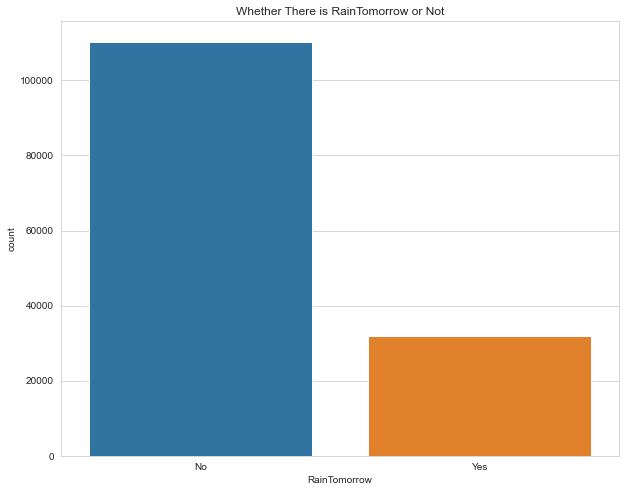

In [9]:
# find out if our data is imbalanced or not
plt.figure(figsize=(10,8))
sns.countplot(df['RainTomorrow'])
plt.title('Whether There is RainTomorrow or Not')
plt.show()

+ There is a class imbalance and we have to handle it we will use oversampling of minority class here

**Explore Variables**

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 16
Discrete features Count 2
Continuous features Count 14
Categorical features Count 7
Binary Categorical features Count 2


**Analysis of Continuous Features**

In [11]:
def generate_distribution_plot(df, continuous_features):
    
    '''
    Plotting distribution of continuous_features
    returns: distribution plot
    '''
    
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

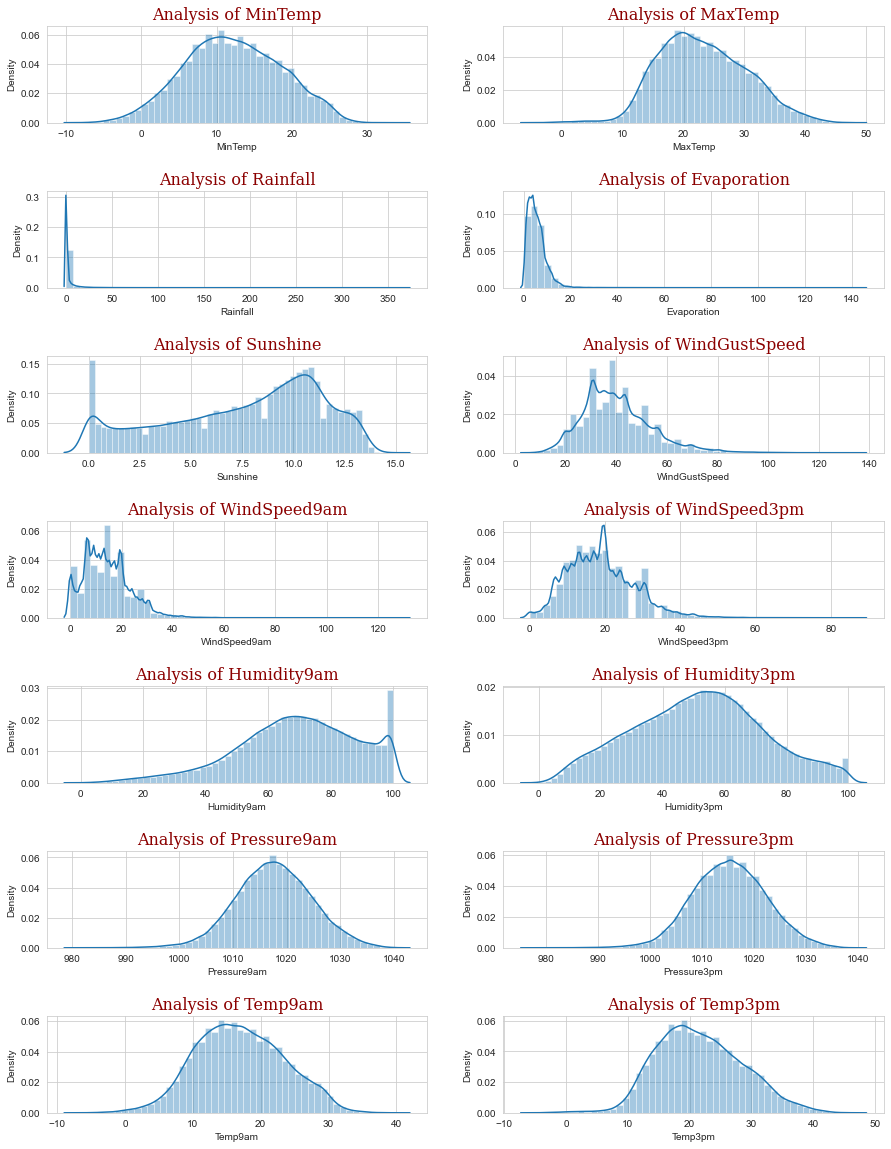

In [12]:
generate_distribution_plot(df, continuous_features)

+ Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers

+ Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns, will use interquantile range to find outliers.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

# We don't need date feature anymore for model building as we already transformed
df.drop('Date', axis=1, inplace=True)

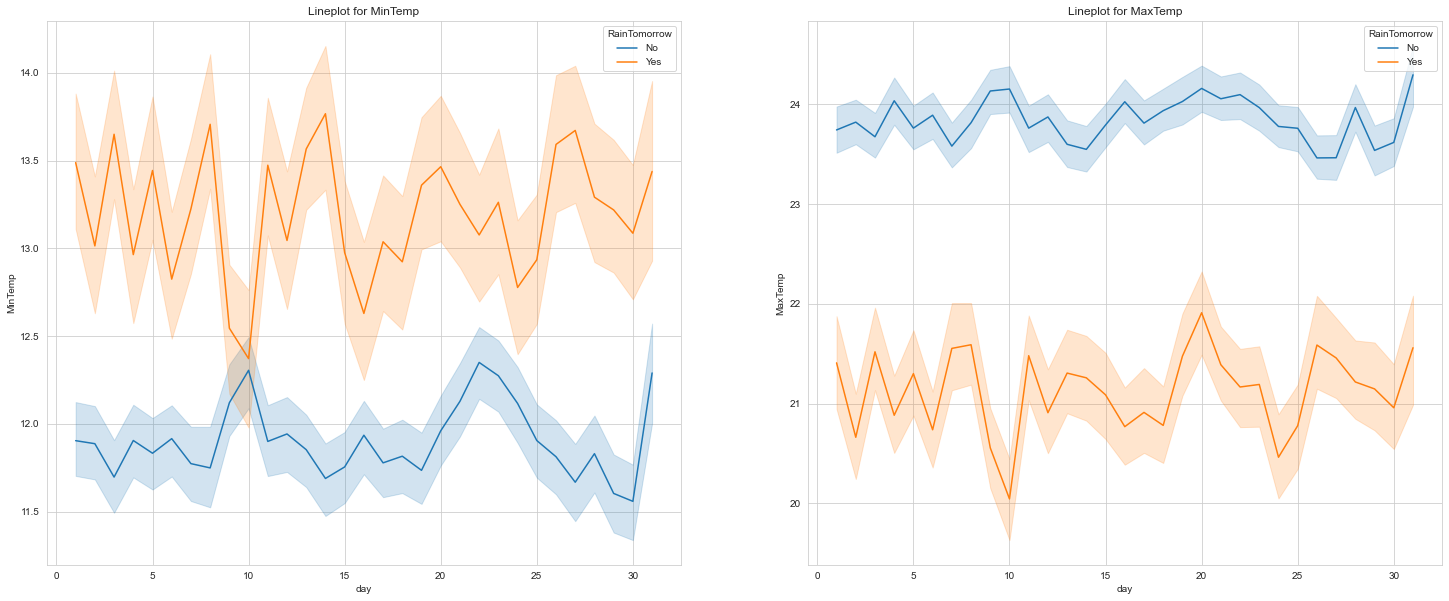

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Mintemp
sns.lineplot(ax=axes[0],x="day",y="MinTemp",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for MinTemp')
# Maxtemp
sns.lineplot(ax=axes[1],x="day",y="MaxTemp",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for MaxTemp')
plt.show()

If temperature difference between min and max temperature is low then probality of rain occuring tomorrow is more.

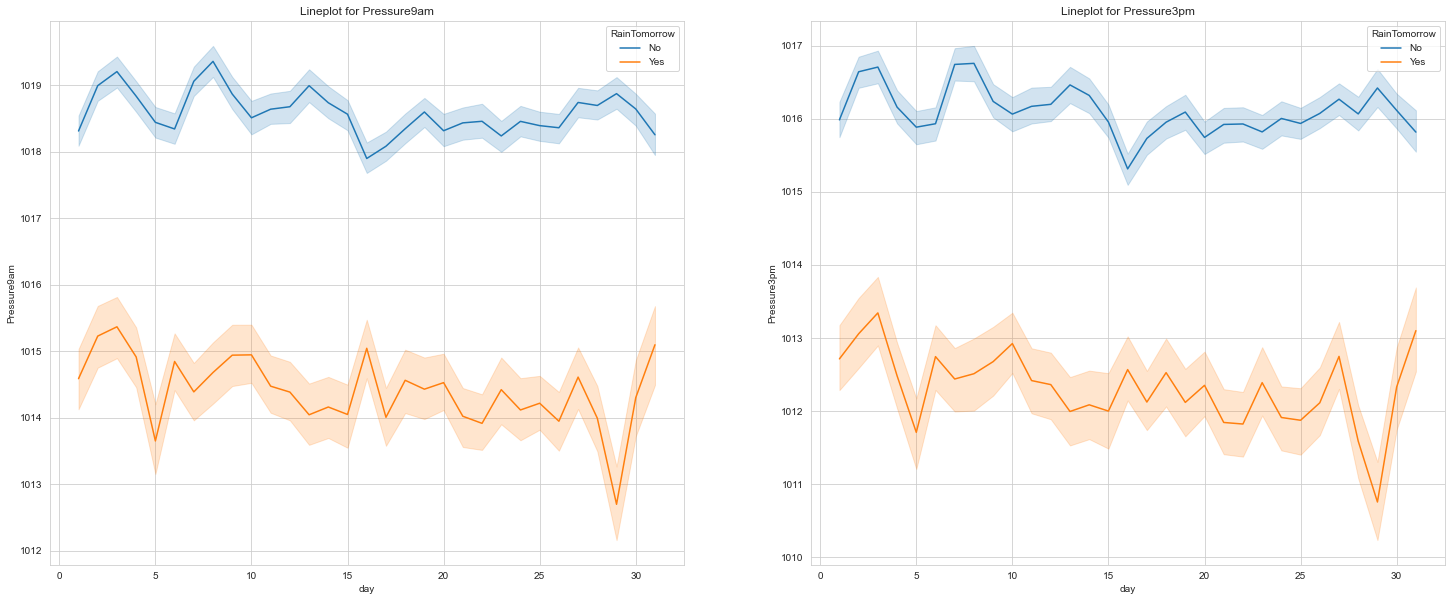

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Pressure9am
sns.lineplot(ax=axes[0],x="day",y="Pressure9am",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for Pressure9am')
# Pressure3pm
sns.lineplot(ax=axes[1],x="day",y="Pressure3pm",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for Pressure3pm')
plt.show()

<h2 style="color:Peru;"> 3. Data Pre-processing and cleaning </h2>


## 3a.preprocessing of the data

#### Identifying NULL or Missing Values

In [16]:
def null_values(df):
    
    missing_values =  df.isnull().sum().reset_index()
    missing_percent = round(df.isnull().sum()/(df.shape[0]),2).reset_index()
    missing =  pd.merge(missing_values, missing_percent, on='index')
    missing.columns = ['features','missing_values','missing%']
    return missing.sort_values(by='missing%', ascending=False)

In [17]:
null_values(df)

,features,missing_values,missing%
5,Sunshine,69835,0.48
4,Evaporation,62790,0.43
17,Cloud3pm,59358,0.41
16,Cloud9am,55888,0.38
14,Pressure9am,15065,0.10
15,Pressure3pm,15028,0.10
6,WindGustDir,10326,0.07
7,WindGustSpeed,10263,0.07
8,WindDir9am,10566,0.07
9,WindDir3pm,4228,0.03



+ We can clearly see that there are lots of missing values in a dataset which we'll have to fill or drop to start the further analysis
+ 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' have very high percentage of missing values

#### Engineering missing values in numerical variables

In [18]:
sample_imputation_features = [col for col in df.columns if (df.isnull().sum()[col] > 50000)]
sample_imputation_features

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [19]:
# Random Sampling for high number of missing values features-
def randomsampleimputation(df, columns):
    
    '''
    filling feature with large percentage of missing data using random sample imputation method
    '''
    
    data = df.copy()
    for column in columns:
        random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=2022)
        random_sample.index = data[data[column].isnull()].index
        data.loc[data[column].isnull(),column] = random_sample
    return data

In [20]:
df = randomsampleimputation(df,sample_imputation_features)

In [21]:
# list of remaining numeric features with null values 
missing_values_numeric_features  = [col for col in df.columns if (df.isnull().sum()[col] > 0) & (df[col].dtypes != 'object')]
missing_values_numeric_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
# Filling the Missing Values – Imputation

def impute_means(df, missing_values_columns):
    data = df.copy()
    '''
    Filling missing values with mean
    '''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
        
    return data

In [23]:
# lets use this function to fill the missing values
df = impute_means(df,missing_values_numeric_features)

In [24]:
# checking the missing values again

# call missingvalues_function
null_values(df)

,features,missing_values,missing%
6,WindGustDir,10326,0.07
8,WindDir9am,10566,0.07
9,WindDir3pm,4228,0.03
21,RainTomorrow,3267,0.02
20,RainToday,3261,0.02
0,Location,0,0.00
14,Pressure9am,0,0.00
23,month,0,0.00
22,year,0,0.00
19,Temp3pm,0,0.00


+ WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow are categorical features

#### Engineering missing values in categorical variables

In [25]:
# Raintoday
df['RainToday'] = df['RainToday'].fillna('No')
# Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')
# WindGustDir
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
# WindDir9am
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
# WindDir3pm
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [26]:
# checking the missing values again

# calling null_values function
null_values(df)

,features,missing_values,missing%
0,Location,0,0.0
13,Humidity3pm,0,0.0
23,month,0,0.0
22,year,0,0.0
21,RainTomorrow,0,0.0
20,RainToday,0,0.0
19,Temp3pm,0,0.0
18,Temp9am,0,0.0
17,Cloud3pm,0,0.0
16,Cloud9am,0,0.0


+ All missing values are imputed

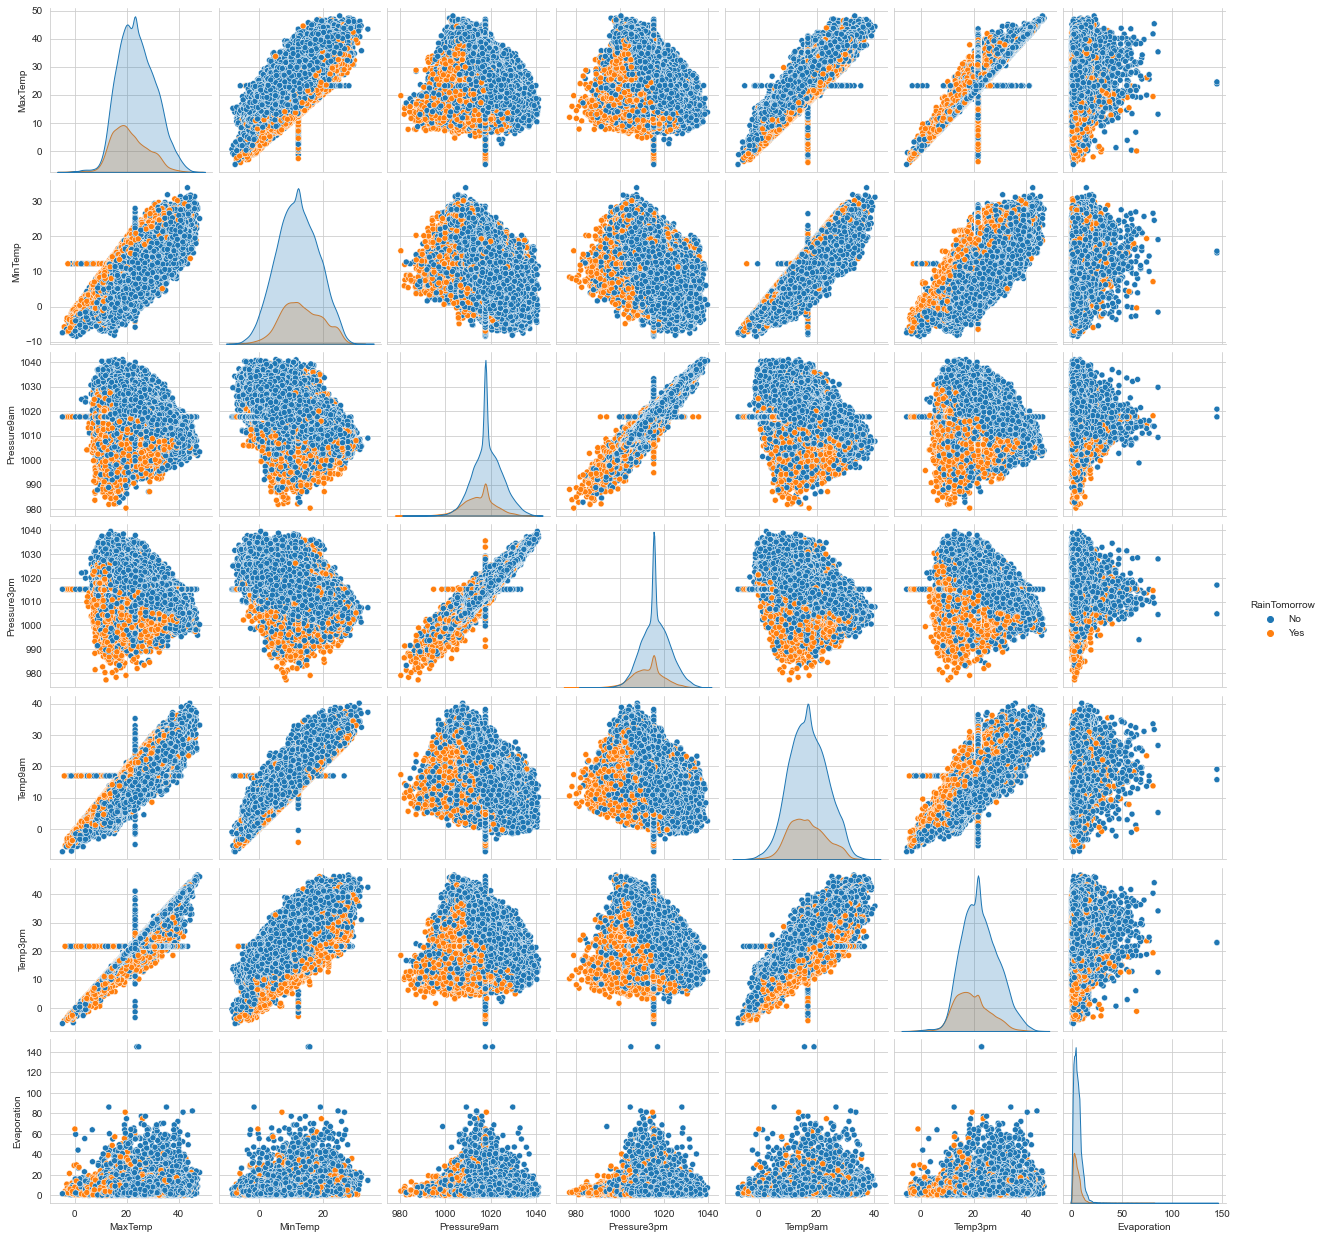

In [27]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

### Identifying outliers

+ we will detect outliers using boxplot and Inter-Quartile Range and remove them to get the final working data set

In [28]:
def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

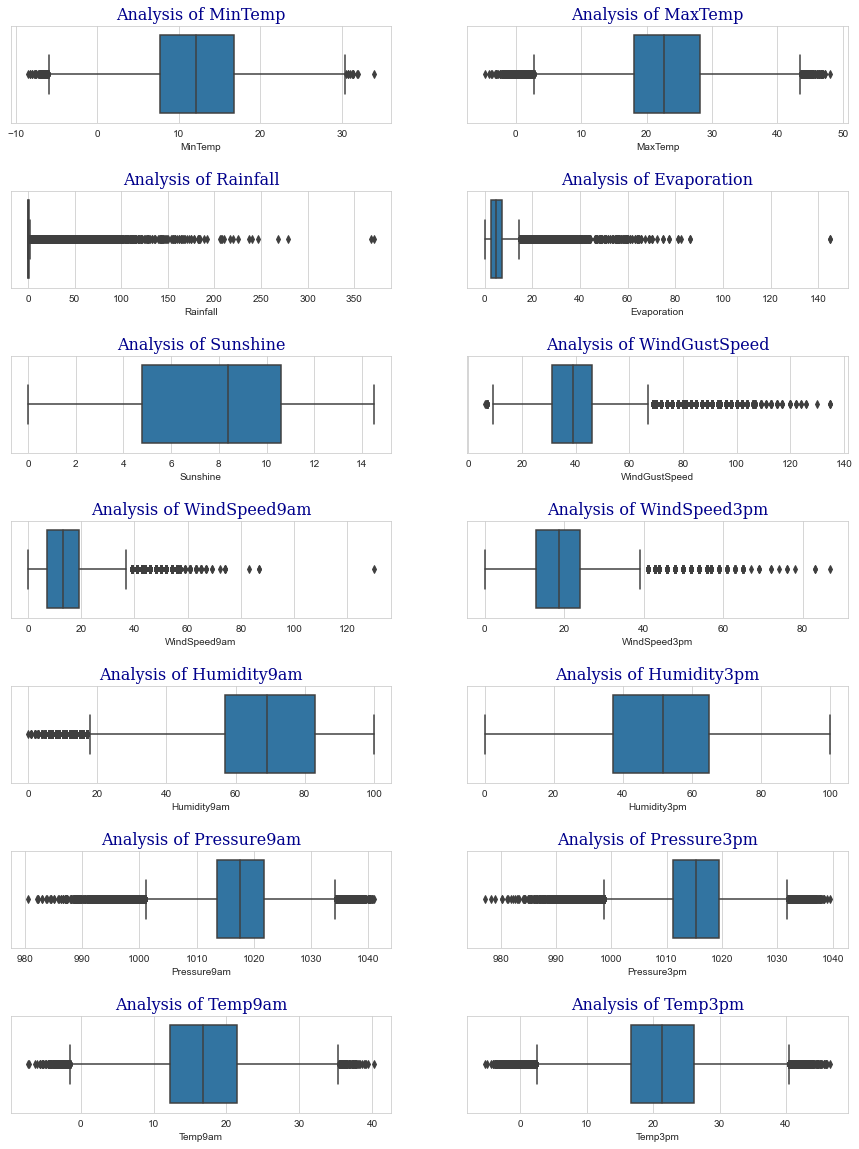

In [29]:
plot_boxplot(df, continuous_features)

+ 'Sunshine', 'Humidity3pm' doesn't have any outliers so we don't need to consider them

In [30]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


#### Engineering outliers in numerical variables

In [31]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe
    
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [32]:
# calling outlier function

df = remove_outliers(df,outliers_features)

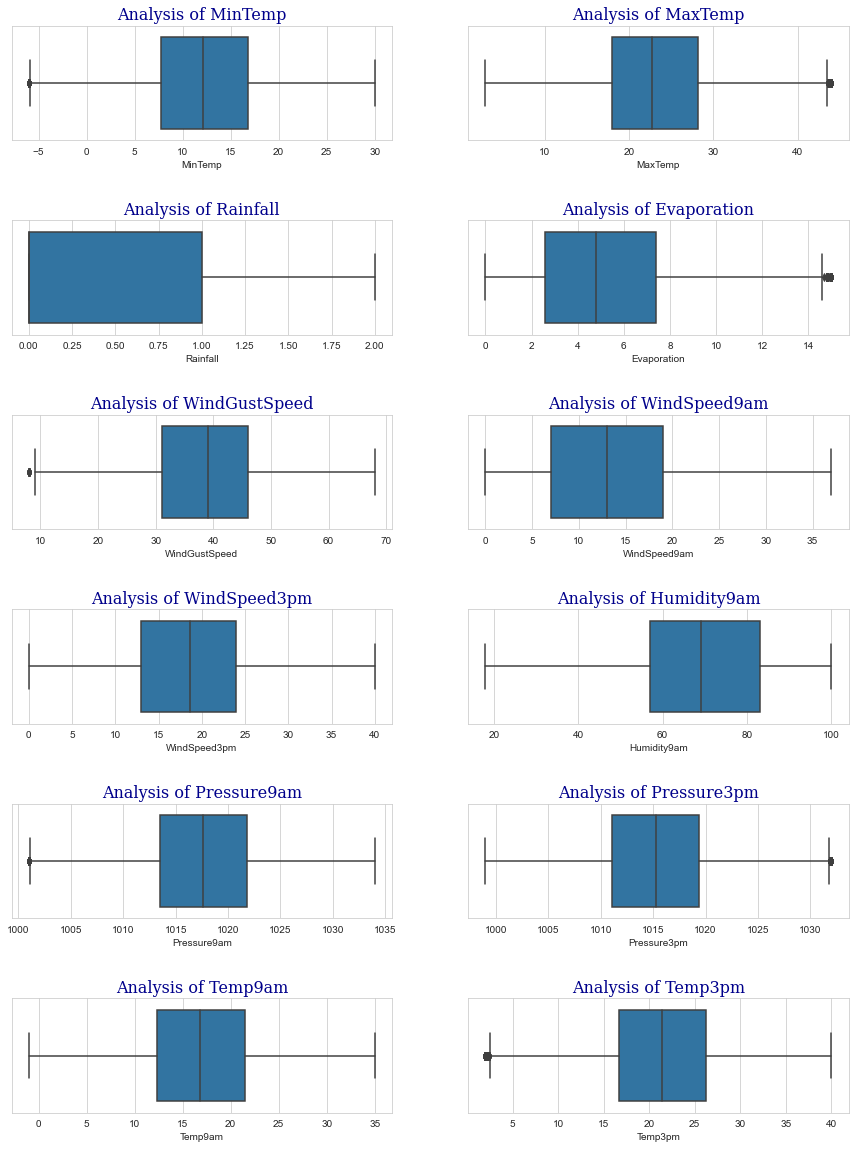

In [33]:
# boxplot after removing outliers

plot_boxplot(df, outliers_features)

+ Outliers are removed and distribution looks better now

# correlation Analysis

   + helps for feature selection and removing
   + helps in identifying multicollinearity

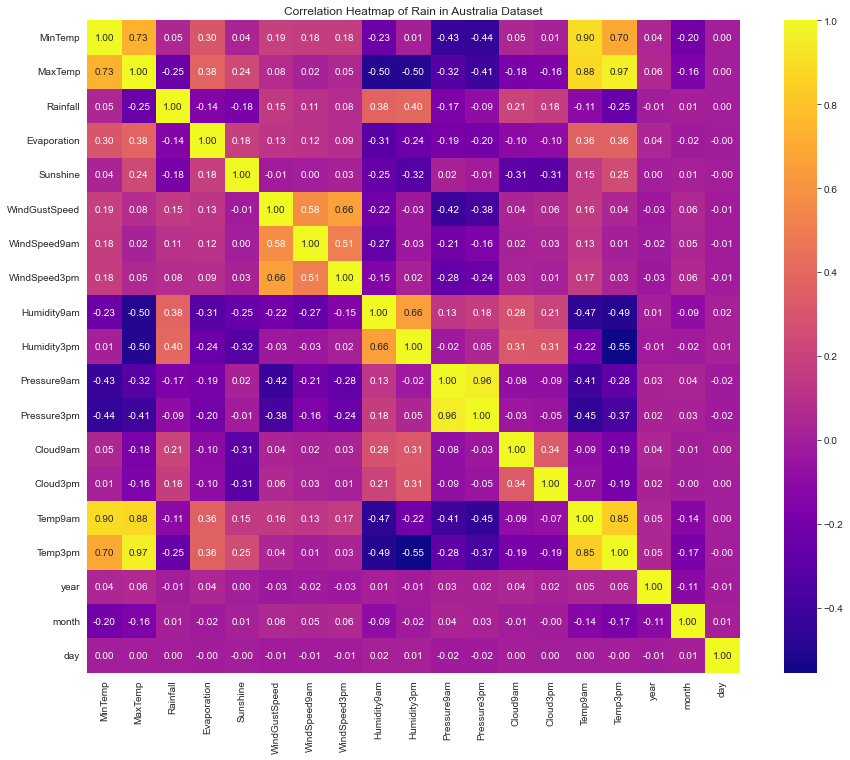

In [34]:
# lets check correlation again
corrmat = df.corr()

# heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='white', cmap='plasma')    
plt.title('Correlation Heatmap of Rain in Australia Dataset')
plt.show()

Interpretation

From the above correlation heatmap, we can conclude that:-

    - MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.73).

    - MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.70).

    - MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

    - MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.88).

    - MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.97).

    - WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.66).

    - Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).
    
    - Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.85).                                 

+ Will drop 'Temp9am','Temp3pm','Pressure3pm' as they are highly correlated and causing multi collinearity

<h2 style="color:Peru;"> Feature transformation </h2>

#### Feature Dropping

In [35]:
# Multicollinearity features

features_to_be_dropped = ['Temp9am','Temp3pm','Pressure3pm']
df.drop(features_to_be_dropped,inplace= True,axis=1)

#### Feature Encoding

In [36]:
# For binary features, we'll use labelencoding
le = LabelEncoder()

label_encoder_features = binary_categorical_features

for col in label_encoder_features:
    df[col] = le.fit_transform(df[col])

In [37]:
# let's check the head again
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,3.2,9.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,8.0,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,3.0,10.8,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,7.0,4.0,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,8.0,10.1,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,7.0,2.0,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,15.0,6.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,5.0,3.0,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,9.0,8.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,0,0,2008,12,5


In [38]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


**OnehotEncoding handles categorical features null values very cleverly so we will use get_dummies function from pandas to handle null values and convert the data into proper format to use machine learning model.**

In [39]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    data = df.copy()
    for col in cols:
        dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        data = pd.concat([data, dummies], axis=1)
        
        # dropping original columns for which encoding is applied.
        data.drop(col, axis=1,inplace=True)
    return data

In [40]:
# Apply onehotencoder on categorical features
df = onehot_encoder(df,categorical_columns)

In [41]:
# Dataframe shape after data preprocessing
df.shape

(145460, 111)

In [42]:
# first five rows of dataframe
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,3.2,9.9,44.0,20.0,24.0,71.0,22.0,1007.7,8.0,8.0,0,0,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,3.0,10.8,44.0,4.0,22.0,44.0,25.0,1010.6,7.0,4.0,0,0,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,8.0,10.1,46.0,19.0,26.0,38.0,30.0,1007.6,7.0,2.0,0,0,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,15.0,6.1,24.0,11.0,9.0,45.0,16.0,1017.6,5.0,3.0,0,0,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,9.0,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,0,0,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [43]:
df.shape

(145460, 111)

<h2 style="color:Peru;"> 4. Data Preparation </h2>

#### splitting the data into X and y


In [44]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [45]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

#### Feature Scaling

In [46]:
# Scaling Numerical Features - Imbalanced data

scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Handling Class Imbalance

In [47]:
# oversampling using SMOTE
sm = SMOTE(random_state=2022)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 90889, 1: 25479})
The number of classes after fit Counter({1: 90889, 0: 90889})


### Feature Importance

### Univariate Feature Selection - ANOVA F-test

The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples. When the F-value increases, the p-value decreases. The F-test allows to understand how much each variable is significant for the target variable.

In order to do this test, we will use SelectKBest() function with f_classif as scoring function. The following custom function returns a dataframe with all the f-tests.

In [48]:
# custom function returns a dataframe with the f-test for each variable against the target one. K=num of features to return, alpha=significance level, X=features, y=target
def SelectBest(K, alpha, X, y):
    # fitting the kbest function
    bestFeatures = SelectKBest(score_func=f_classif, k=K)
    fit = bestFeatures.fit(X,y)
    new_X = bestFeatures.transform(X)
    # create dataframe for the results
    dfscores = pd.DataFrame(fit.scores_)
    dfpvalue = pd.DataFrame(fit.pvalues_)
    dfsignif = pd.DataFrame(fit.pvalues_ < alpha)
    dfcolumns = pd.DataFrame(X.columns)
    # concat dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores,dfpvalue,dfsignif],axis=1)
    # naming the dataframe columns and sorting
    featureScores.columns = ['Feature','ANOVA F-stats','p_value','p_value < alpha']
    featureScores.sort_values('ANOVA F-stats', inplace=True, ascending=False)
    return featureScores, new_X

In [49]:
# computing the f-test for all the columns
result, new_X = SelectBest(19, 0.01, X_train, y_train)
result.head(20)

,Feature,ANOVA F-stats,p_value,p_value < alpha
9,Humidity3pm,26739.999052,0.000000e+00,True
2,Rainfall,12683.795048,0.000000e+00,True
13,RainToday,12119.537552,0.000000e+00,True
8,Humidity9am,7758.613830,0.000000e+00,True
4,Sunshine,6611.820671,0.000000e+00,True
10,Pressure9am,6473.606007,0.000000e+00,True
12,Cloud3pm,6362.958909,0.000000e+00,True
5,WindGustSpeed,5811.262411,0.000000e+00,True
11,Cloud9am,4752.288619,0.000000e+00,True
1,MaxTemp,2941.230471,0.000000e+00,True


### Mutual Information Score

Mutual information (MI) between two variables is a measeure of dependency between the variables. It is equal to zero only if two variables are independent and higher values mean higher dependency.

The following custom function returns a dataframe with the MI scores between the target variable and all the other features, computed using the mutual_info_classif() function.

In [50]:
# custom function for the MI scores. 
def compute_mutual_information(X, y, seed):
    col_names = pd.DataFrame(X.columns)
    # MI computing
    mi = pd.DataFrame(mutual_info_classif(X,y,random_state=seed))
    # dataframe creation
    mutualInfo = pd.concat([col_names,mi],axis=1)
    # setting cols names
    mutualInfo.columns = ["Feature",'Importance']
    # ordering results
    mutualInfo.sort_values('Importance', inplace=True, ascending=False)
    return mutualInfo

In [51]:
# visualize feature importance
result_mi = compute_mutual_information(X_train, y_train, 42)
result_mi.head(20)

,Feature,Importance
9,Humidity3pm,0.109495
2,Rainfall,0.048234
13,RainToday,0.043569
8,Humidity9am,0.036254
12,Cloud3pm,0.030130
4,Sunshine,0.027210
10,Pressure9am,0.025917
5,WindGustSpeed,0.025282
11,Cloud9am,0.022082
1,MaxTemp,0.017502


# ANN Model Building

In [52]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
2910/2910 [==============================] - 8s 2ms/step - loss: 0.4238 - accuracy: 0.7813 - val_loss: 0.3804 - val_accuracy: 0.7799
Epoch 2/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.4065 - accuracy: 0.8319 - val_loss: 0.3741 - val_accuracy: 0.8490
Epoch 3/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3995 - accuracy: 0.8374 - val_loss: 0.3693 - val_accuracy: 0.8493
Epoch 4/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3944 - accuracy: 0.8382 - val_loss: 0.3684 - val_accuracy: 0.8508
Epoch 5/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3923 - accuracy: 0.8409 - val_loss: 0.3641 - val_accuracy: 0.8521
Epoch 6/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3875 - accuracy: 0.8424 - val_loss: 0.3623 - val_accuracy: 0.8504
Epoch 7/100
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3842 - accuracy: 0.8448 - val_loss: 0.3602 - val_ac

#### Training and Validation loss

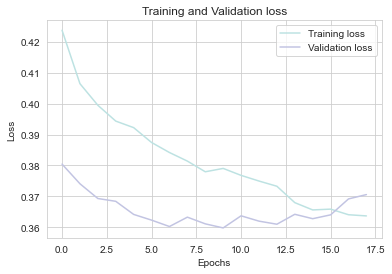

In [53]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

#### Training and Validation accuracy

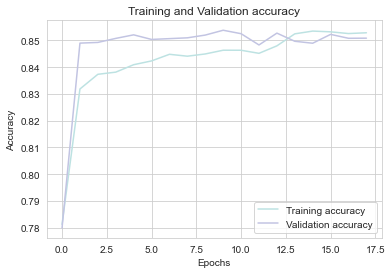

In [54]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = np.where((y_pred > 0.5),1,0)
print(y_pred)

910/910 [==============================] - 1s 1ms/step
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### Performance Evaluation

In [56]:
print('Initial Model Accuracy',accuracy_score(y_test, y_pred))

Initial Model Accuracy 0.8476557129107658


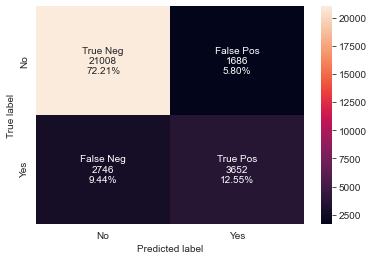

In [60]:
cm = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['No','Yes']


sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Keras Tuner

In [61]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


def build_model(hp):
    
    model = Sequential()
    
    counter = 0
    
    for i in range(hp.Int('num_layer', min_value=1, max_value = 10)):
        
        if counter == 0:
            
            model.add(Dense(
                    units=hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=X_train.shape[1]))
            
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
                   
        else:
            
            model.add(
                Dense(
                    hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid'])))
            
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
            
        counter += 1
    
    model.add(Dense(units=1, activation='sigmoid'))
        
    model.compile(hp.Choice('optimizer', values=['adam', 'adadelta', 'sgd', 'rmsprop', 'nadam', 'adagrad']), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [62]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='mydir4', project_name='ANN_dROP')

In [63]:
tuner.search(X_train, y_train, epochs=5, validation_data=[X_test, y_test])

Trial 3 Complete [00h 00m 52s]
val_accuracy: 0.8388216495513916

Best val_accuracy So Far: 0.8465901017189026
Total elapsed time: 00h 02m 49s
INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 4,
 'units0': 32,
 'activation0': 'relu',
 'dropout0': 0.1,
 'optimizer': 'sgd',
 'units1': 40,
 'activation1': 'tanh',
 'dropout1': 0.1,
 'units2': 96,
 'activation2': 'relu',
 'dropout2': 0.2,
 'units3': 120,
 'activation3': 'tanh',
 'dropout3': 0.6,
 'units4': 80,
 'activation4': 'relu',
 'dropout4': 0.5,
 'units5': 32,
 'activation5': 'relu',
 'dropout5': 0.5,
 'units6': 128,
 'activation6': 'tanh',
 'dropout6': 0.1,
 'units7': 128,
 'activation7': 'relu',
 'dropout7': 0.6}

In [65]:
model_kt = tuner.get_best_models(num_models=1)[0]

In [66]:
model_kt.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3552      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                1320      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 96)                3936      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 120)               1

In [67]:
history = model_kt.fit(X_train, y_train, epochs=100, initial_epoch=5, validation_split=0.2)

Epoch 6/100
2910/2910 [==============================] - 9s 3ms/step - loss: 0.3635 - accuracy: 0.8446 - val_loss: 0.3522 - val_accuracy: 0.8476
Epoch 7/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3617 - accuracy: 0.8448 - val_loss: 0.3514 - val_accuracy: 0.8487
Epoch 8/100
2910/2910 [==============================] - 9s 3ms/step - loss: 0.3596 - accuracy: 0.8457 - val_loss: 0.3500 - val_accuracy: 0.8487
Epoch 9/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3586 - accuracy: 0.8471 - val_loss: 0.3492 - val_accuracy: 0.8492
Epoch 10/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3563 - accuracy: 0.8480 - val_loss: 0.3494 - val_accuracy: 0.8506
Epoch 11/100
2910/2910 [==============================] - 9s 3ms/step - loss: 0.3554 - accuracy: 0.8484 - val_loss: 0.3475 - val_accuracy: 0.8504
Epoch 12/100
2910/2910 [==============================] - 9s 3ms/step - loss: 0.3539 - accuracy: 0.8493 - val_loss: 0.3465 - val

2910/2910 [==============================] - 8s 3ms/step - loss: 0.3257 - accuracy: 0.8610 - val_loss: 0.3329 - val_accuracy: 0.8584
Epoch 63/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3247 - accuracy: 0.8615 - val_loss: 0.3318 - val_accuracy: 0.8589
Epoch 64/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3257 - accuracy: 0.8605 - val_loss: 0.3315 - val_accuracy: 0.8587
Epoch 65/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3240 - accuracy: 0.8624 - val_loss: 0.3329 - val_accuracy: 0.8579
Epoch 66/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3254 - accuracy: 0.8614 - val_loss: 0.3326 - val_accuracy: 0.8574
Epoch 67/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3241 - accuracy: 0.8620 - val_loss: 0.3327 - val_accuracy: 0.8567
Epoch 68/100
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3237 - accuracy: 0.8625 - val_loss: 0.3321 - val_accuracy

### Training and Validation loss 

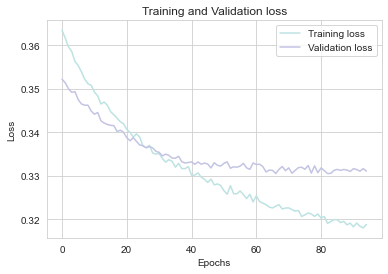

In [68]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

### Training and Validation accuracy

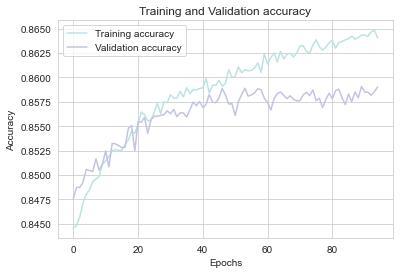

In [69]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predicting the test set result

In [70]:
y_pred_kt = model_kt.predict(X_test)
y_pred_kt = np.where((y_pred_kt > 0.5),1,0)
print(y_pred_kt)

910/910 [==============================] - 2s 2ms/step
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### Final Model Accuracy

In [71]:
print('Final Model Accuracy', accuracy_score(y_test, y_pred_kt))

Final Model Accuracy 0.8567991200329987


### confusion matrix

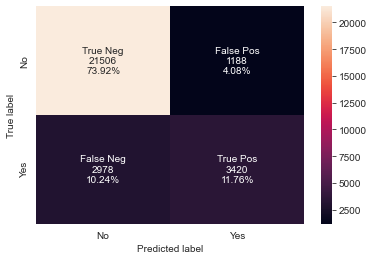

In [72]:
cm = confusion_matrix(y_test,y_pred_kt)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['No','Yes']


sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [73]:
# saving model

dbfile = open('model.pkl', 'wb')
# source, destination
pickle.dump(model, dbfile)

dbfile2 = open('model_kt.pkl', 'wb')
# source, destination
pickle.dump(model_kt, dbfile2)

INFO:tensorflow:Assets written to: ram://174b932a-8e51-4a5b-96fd-21132d4d4837/assets
INFO:tensorflow:Assets written to: ram://6832efe6-be40-4971-bb3a-2e2b0c860ab8/assets


### Results and Conclusion 

+ The initial ANN model accuracy score is 0.84 and after hyperparameter tuning accuracy is 0.856. 
  The model does a very good job in predicting whether or not it will rain tomorrow.

+ Small number of observations predict that there will be rain tomorrow(True Positive). Majority of observations predict that there will be no rain tomorrow(True Negative).

+ The model shows no signs of overfitting.

+ Data has class Imbalance and in the Final ANN model, we have FP = 1188 whereas FN = 2978

+ Model has good precision rate which depends on False Positives and less recall rate which depends on False Negatives